In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


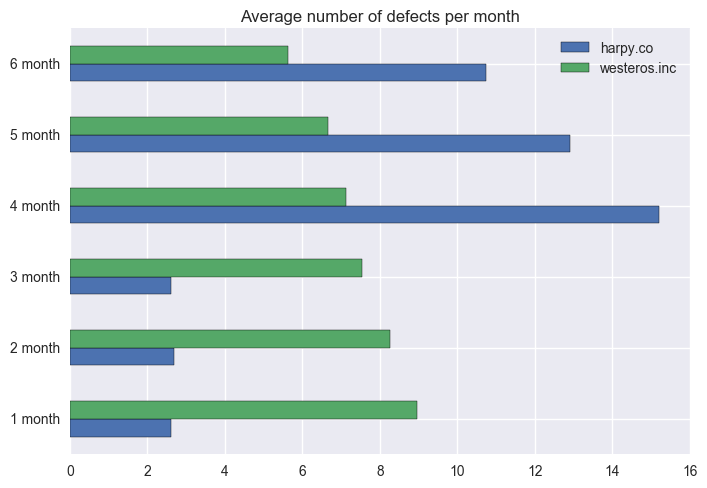

In [9]:
pdata = pd.read_csv('production-data.csv', delimiter=',')
pdata['new'] = pdata['report.date'] - pdata['production.date']
gb = pdata.groupby(['supplier', 'new'])['defects']
gb = gb.mean()
harp_co = np.array(gb['harpy.co'][1:])
west_inc = np.array(gb['westeros.inc'][1:])

d = (np.array([harp_co, west_inc])).transpose()
df = pd.DataFrame(data=d)
rvals = ['1 month', '2 month', '3 month', '4 month', '5 month', '6 month']
df.columns = ['harpy.co', 'westeros.inc']
ax = df.plot(kind='barh', stacked=False)
ax.set_yticklabels(rvals)
ax.set_xlim([0, 16])
plt.title('Average number of defects per month')
plt.show()


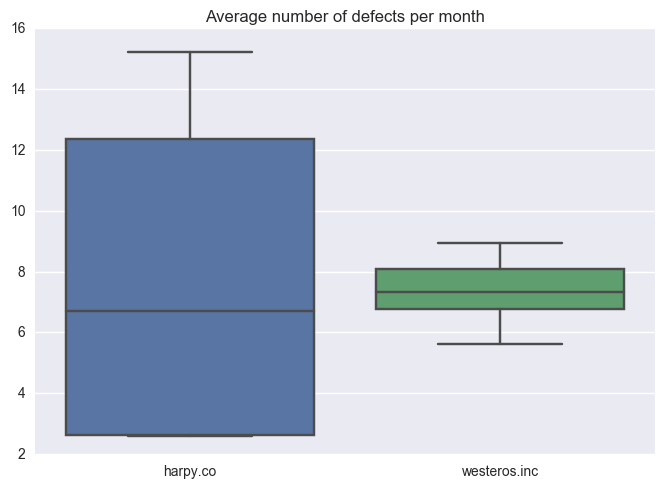

In [10]:
d = {'harpy.co': harp_co, 'westeros.inc': west_inc}
df = pd.DataFrame(data=d)
sns.plt.title('Average number of defects per month')
sns.boxplot(data=df)
plt.show()


In [11]:
sum_def_harp = np.zeros(6)
sum_def_west = np.zeros(6)
test_harp = np.zeros(6)
test_west = np.zeros(6)

pdata = pd.read_csv('production-data.csv', delimiter=',', header=None)
pdata = np.array(pdata[1:])
n, m = np.shape(pdata)
for i in range(n):
    tmp_1 = float(pdata[i, 3]) - float(pdata[i, 4])
    tmp_2 = float(pdata[i, 3]) * (8 - float(pdata[i, 2]))
    - float(pdata[i, 4]) * (8 - float(pdata[i, 2]))
    if pdata[i, 5] == 'harpy.co':
        for j in range(6):
            if int(pdata[i, 1]) == j + 1:
                test_harp[j] += tmp_1
                sum_def_harp[j] += tmp_2
    if pdata[i, 5] == 'westeros.inc':
        for j in range(6):
            if int(pdata[i, 1]) == j + 1:
                test_west[j] += tmp_1
                sum_def_west[j] += tmp_2


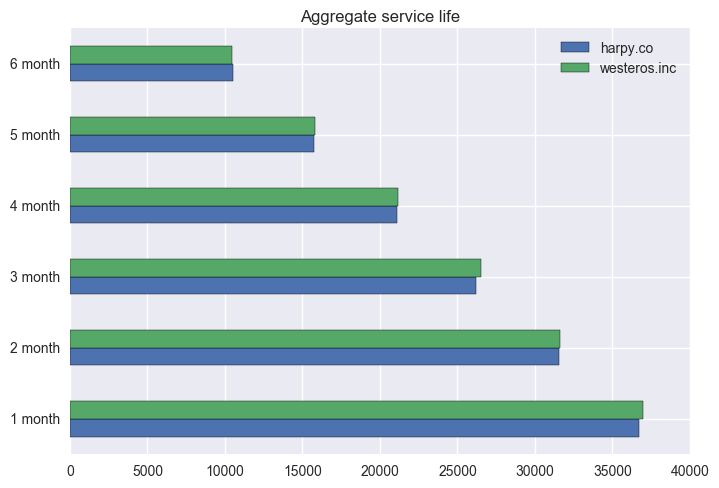

In [12]:
d = (np.array([sum_def_harp, sum_def_west])).transpose()
df = pd.DataFrame(data=d)
rvals = ['1 month', '2 month', '3 month', '4 month', '5 month', '6 month']
df.columns = ['harpy.co', 'westeros.inc']
ax = df.plot(kind='barh', stacked=False)
ax.set_yticklabels(rvals)
ax.set_xlim([0, 40000])
plt.title('Aggregate service life')
plt.savefig('123.png', format='png', dpi=20)
plt.show()


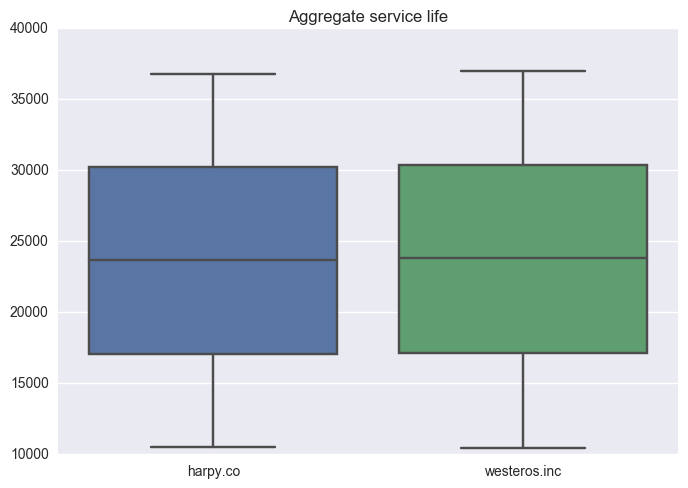

In [13]:
sns.plt.title('Aggregate service life')
d = {'westeros.inc': sum_def_west, 'harpy.co': sum_def_harp}
df = pd.DataFrame(data=d)
sns.boxplot(data=df)
plt.show()
